In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from polyglot.text import Text
import re
import json
from polyglot.tokenize import WordTokenizer
from polyglot.base import Sequence

from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
sns.set(style='white') 

In [4]:
data = pd.concat([pd.read_json(f, lines=True) for f in glob.glob("../data/houses*.jl")])
data = data.drop(columns=["adaugat_la", "Compartimentare", "Etaj"])
data["nr_anunt"] = data["nr_anunt"].map(lambda x: x[0] if type(x) == list else x)

data.set_index('nr_anunt', inplace=True)

data['CohortGroup'] = data.groupby(level=0)['date'].min()
data.reset_index(inplace=True)
data.head()

nr_anunt An constructie           Camere Locuinta mobilata / utilata  \
0  130755631            NaN  4 sau mai multe                     Partial   
1  131655047            NaN  4 sau mai multe                         NaN   
2  113666740            NaN  4 sau mai multe                     Complet   
3  152522749            NaN  4 sau mai multe                         NaN   
4  152043909            NaN  4 sau mai multe                         NaN   

    Oferit de Suprafata utila       date    price  \
0  Proprietar          215 m² 2018-02-07   65000€   
1     Agentie          200 m² 2018-02-07  245000€   
2     Agentie          145 m² 2018-02-07   95000€   
3     Agentie          221 m² 2018-02-07  105000€   
4  Proprietar             NaN 2018-02-07  149000€   

                                                text  \
0  CASA de vanzare DRAGESTI  25 Km de oradea,Casa...   
1  Gaminvest propune spre vanzare, vila D+P+1 cu ...   
2  Casa 4 camere de vanzare, Oradea zona ultracen...   
3  De vânzare URGENT casa compusa din 2 corpuri c...   
4  Proprietar vand 2 cladiri cu 24 de apartamente...   

                                               title                    type  \
0  Casa de vanzare sau schimb cu apartament sau t...  Case de vanzare Oradea   
1      Vila de vanzare in Oncea, Oradea, Bihor V1322  Case de vanzare Oradea   
2  Casa 4 camere de vanzare, Oradea zona ultracen...  Case de vanzare Oradea   
3           Urgent casa 2 corpuri ,zona Centru Civic  Case de vanzare Oradea   
4         Vand in Germania bloc cu 24 de apartamente  Case de vanzare Oradea   

                                                 url CohortGroup  
0  https://www.olx.ro/oferta/casa-de-vanzare-sau-...  2018-02-07  
1  https://www.olx.ro/oferta/vila-de-vanzare-in-o...  2018-02-07  
2  https://www.olx.ro/oferta/casa-4-camere-de-van...  2018-02-07  
3  https://www.olx.ro/oferta/urgent-casa-2-corpur...  2018-02-07  
4  https://www.olx.ro/oferta/vand-in-germania-blo...  2018-02-07

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1000)
pd.set_option('expand_frame_repr', False)  # more options can be specified also
data[data["type"]  == "Case de vanzare Oradea"].sample(10)


nr_anunt An constructie           Camere Locuinta mobilata / utilata   Oferit de Suprafata utila       date    price                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text                                                            title                    type                                                                                                   url CohortGroup
127338  144515347            NaN         3 camere                         NaN     Agentie          180 m² 2018-04-19  112000€                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Va propunem spre vanzare Casa familiala cu curte Parter + Mansarda situata in apropirere de str.Muntele Gaina si Bunexim. Suprafata construita a casei este de 200 mp, suprafata, suprafata utila 180 mp, suprafata teren aferent 300 mp.                       Casa familiala cu curte langa Piata Cetate  Case de vanzare Oradea                     https://www.olx.ro/oferta/casa-familiala-cu-curte-langa-piata-cetate-ID9Mn2H.html  2018-02-07
111070  154865833            NaN         2 camere                     Partial  Proprietar           89 m² 2018-04-10   45500€                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Vând casă cu 2 dormitoare, bucătărie mare, cămară de alimente, baie cu boiler mixt, 2 holuri din unul se mai poate face o cameră, terasă de 42 mp ,curte SI gradina, singur in curte, acces auto. Casă se află la intrare in Oșorhei si  este amplasată la etaj , dedesubt se află un garaj care nu este al meu. Sau schimb cu apartament 2 camere in Oradea exclus etajul 4. Pt mai multe detalii ,va rog sunați la Nr . :                                                  Vând sau schimb  Case de vanzare Oradea                                                https://www.olx.ro/oferta/vand-sau-schimb-IDatNG1.html  2018-03-27
17275   137316107  

In [176]:
len(data[data["type"]  == "Case de vanzare Oradea"]["text"].unique())

2603

In [35]:
merged= data[data["type"]  == "Case de vanzare Oradea"].merge(unique_text[["text", "city inf", "str inf", "neighb inf"]],
                                                              how='left')

In [36]:
merged.shape

(77216, 16)

In [37]:
merged.to_csv("annot_houses.csv")

In [4]:
data[(data["text"].str.contains("ultracentral")) & (data["type"]  == "Case de vanzare Oradea")]

nr_anunt An constructie           Camere Locuinta mobilata / utilata   Oferit de Suprafata utila       date      price                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text                                                                   title                    type                                                                                                          url CohortGroup
2       113666740            NaN  4 sau mai multe                     Complet     Agentie          145 m² 2018-02-07     95000€                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Casa 4 camere de vanzare, Oradea zona ultracentralaCora Proiect Imobiliare va propune spre vanzare casa cu 4 camere  situata in  Oradea in zona ultracentrala.                     Casa 4 camere de vanzare, Oradea zona ultracentrala  Case de vanzare Oradea                    https://www.olx.ro/oferta/casa-4-camere-de-vanzare-oradea-zona-ultracentrala-ID7GWUv.html  2018-02-07
238     133282157            NaN  4 sau mai multe                         NaN     Agentie          254 m² 2018-02-07    239000€                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        De vanzare o proprietate situata ultracentral , in zona usor accesibila , rezidentiala si de servicii , birouri , cu front mare ,in vecinatatea unor institutii cunoscute si cautate . Cladirea proprietatii este solida si sanatoasa , partea de mansarda fiind constructie relativ noua  si dispunand  de un beci de 34 mp. Terenul total are o suprafata de 348 mp , incluzand terenul pe care e situata constructia, iar suprafata utila totala este 254 mp. Foarte buna investitie , recomand !Agentia nu percepe comision de la cumparator.                   Proprietate situata ultracentral , zona extraordinara  Case de vanzare Oradea                   https://www.olx.ro/oferta/proprietate-situata-ultracentral-zona-extraordin

In [4]:

values = []
annots = {3: "Street", 5: "City", 4: "Neighborhood"}
for line in open("../data/annot.json").readlines():
    struct = json.loads(line)
    v = {"text": struct['text'], "Street": "", "City":"", "Neighborhood":""}
    text = Text(struct['text'],'ro')
    for annot in struct['annotations']:
        start = annot['start_offset']
        end = annot['end_offset']
        v[annots[annot["label"]]] = struct['text'][start:end]
    v['polyglot'] = [x for x in text.entities if x.tag =="I-LOC"]
    values.append(v)
    #print(json.loads(line)['annotations'])
res = pd.DataFrame(values)

In [23]:
res[["Street", "text"]].dropna()

Street                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text
0                 str. Coziei                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Casa este situata intr-o zona foarte buna a orasului str. Coziei, in apropierea str. Horia,  si se constituie din demisol+parter; constructie din caramida din anul 1929 cu suprafata 110 mp pe nivel si o curte de cca 30mp.
1                              Casa de vanzare Paleu, OradeaVa propunem spre vanzare casa in Paleu, construita in anul 2008, pe un teren in suprafata de 488 metri patrati. Imobilul se afla dupa serpentinele adiacente cart. Oncea. Casa este construita in regim P+E, fiind finisata cu materiale de cea mai buna calitate, pe un teren cu front stradal 20 de metri si intrare auto. Suprafata construita a casei este de 200 mp, iar suprafata utila este de 160 mp. La subsolul acestei case se gaseste o camera tehnica in suprafata de 6 metri patrati. Parterul imobilului este compus din: hol, living + bucatarie cu loc de luat masa si iesire pe terasa, 1 camera,  camara de alimente, baie cu dus. La etaj se gasesc: 3 dormitoare, din care dormitorul matrimonial are dressing si iesire pe terasa. Baia este generoasa frumos amenajata cu tot mobilierul de baie si jacuzzi. Finisajele sunt bine executate, gresie in baie, hol si bucatarie, podele laminate in camere si living, usi din lemn, geamuri termopan cu rolete. Pe exterior, izola...
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              RE/MAX Joy va propu

In [32]:
tokenizer = WordTokenizer('ro')
stemmer = SnowballStemmer('romanian')
def get_street(row):
    descr = row['text']
    city = row["city inf"]
    title = row['title']
    if city:
        return ""
    for text in [descr, title]:
        if len(text) == 0:
            continue
        text = " ".join([x for x in tokenizer.transform(Sequence(text)) if x.isalnum()])
        query = "((str\.?|strada|calea) ?("+"|".join(streets).lower()+"))"
        match = re.search(query, text, re.IGNORECASE) 
        if match:
            return match.groups(0)[0]
    return ""

def get_city(row):
    descr = row['text']
    title = row['title']
    for text in [descr, title]:
        if len(text) == 0:
            continue
        text = text.lower()
        words = tokenizer.transform(Sequence(text))
        match = re.search("la ?(\d+) ?(de )?km de", text, re.IGNORECASE)
        check = False
        if match and int(match.group(1)) > 5:
            print(match)
            check = match.group(0)
        for c in cities:
            if c in words:
                return c
        # Multi word cities can be matched safely in text without false positives
        for c in multi_cities:
            if c in text:
                return c
        if "calea santandrei" not in text and "santandrei" in text:
            return "santandrei"
        if check:
            return check
    return ""

def get_neighborhood(row):
    descr = row['text'].lower()
    city = row["city inf"]
    title = row['title']
    if city:
        return ""
    for text in [descr, title]:
        if len(text) == 0:
            continue
        words = tokenizer.transform(Sequence(text))
        text = " ".join([x for x in words if x.isalnum()])

        query = "((cart\.?|cartier|cartierul) ?("+"|".join(neighb).lower()+"))"
        match = re.search(query, text, re.IGNORECASE) 
        if match:
            return match.groups(0)[2]

        query = "(zona ("+"|".join(zone).lower()+"))"
        match = re.search(query, text, re.IGNORECASE) 
        if match:
            return match.groups(0)[1]

        for c in neighb:
            if c in words:
                return c
        for c in misc:
            if c in text:
                return c
    return ""

In [33]:
unique_text = data[data["type"]  == "Case de vanzare Oradea"].groupby("text", as_index=False).first()
unique_text["city inf"] = unique_text.apply(get_city, axis=1)
unique_text["str inf"] = unique_text.apply(get_street,axis=1)
unique_text["neighb inf"] = unique_text.apply(get_neighborhood, axis=1)

<_sre.SRE_Match object; span=(25, 35), match='la 18km de'>
<_sre.SRE_Match object; span=(108, 119), match='la 12 km de'>
<_sre.SRE_Match object; span=(170, 181), match='la 10 km de'>
<_sre.SRE_Match object; span=(83, 94), match='la 20 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 15 km de'>
<_sre.SRE_Match object; span=(28, 42), match='la 20 de km de'>
<_sre.SRE_Match object; span=(53, 67), match='la 25 de km de'>
<_sre.SRE_Match object; span=(34, 45), match='la 10 km de'>
<_sre.SRE_Match object; span=(188, 199), match='la 12 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 25km de'>
<_sre.SRE_Match object; span=(18, 28), match='la 22km de'>
<_sre.SRE_Match object; span=(23, 34), match='la 17 km de'>
<_sre.SRE_Match object; span=(59, 70), match='la 18 km de'>
<_sre.SRE_Match object; span=(5, 16), match='la 30 km de'>
<_sre.SRE_Match object; span=(5

In [34]:
unique_text.sample(10)

text   nr_anunt  An constructie           Camere Locuinta mobilata / utilata   Oferit de Suprafata utila       date    price                                                         title                    type                                                                                                  url CohortGroup  city inf            str inf    neighb inf
986                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        De vanzare casa la Gepiu este locuiibila pusa la punct se vinde mobilata  se poate locuii si doua famili are inbunatatiri casa mai are anexe gradina pomi fructiferi  este canalizare mai multe inf la tel etc tel  153609223             NaN  4 sau mai multe                     Complet  Proprietar        1 000 m² 2018-02-20   33000€                                               De vanzare casa  Case de vanzare Oradea                                               https://www.olx.ro/oferta/de-vanzare-casa-IDaovM7.html  2018-02-20     gepiu                                 
268                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Casa construita din BCA si caramida, partial izolata, geamuri termopan, anul constructiei 1988. Casa este compusa din doua corpuri, primul : 3 camere+living, baie, bucatarie+sufragerie iar celalalt corp: bucatarie, camera si camara. Alte suprafate construite : garaj, atelier, beci, terasa acoperita, depozit de lemne. Incalzire centralizata pe lemn. Suprafata terenului este de 1250 m2 (curte+gradina). Accept si schimb cu apartament 3 camere la Oradea (preferabil zona rogerius) + diferenta din partea cumparatorului.  116930251             NaN  4 sau mai multe                     Partial  Proprietar          100 m² 2018-02-07   85000€                                        Vand Casa in Episcopia  Case de vanzare Oradea                                        https://www.olx.ro/oferta/vand-casa-in-episcopia-ID7UCTN.html  2018-02-07                                   rogerius
306                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Casa cu teren intravilan este si

In [61]:
res["str inf"] = res.apply(get_street,axis=1)

In [60]:
res["city inf"] = res["text"].apply(get_city)

<_sre.SRE_Match object; span=(156, 166), match='la 80km de'>
<_sre.SRE_Match object; span=(238, 248), match='la 39km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 20 km de'>
<_sre.SRE_Match object; span=(34, 44), match='la 10km de'>
<_sre.SRE_Match object; span=(62, 73), match='la 60 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 30 km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 17 km de'>
<_sre.SRE_Match object; span=(46, 57), match='la 15 km de'>
<_sre.SRE_Match object; span=(83, 94), match='la 20 km de'>
<_sre.SRE_Match object; span=(184, 198), match='la 50 de km de'>
<_sre.SRE_Match object; span=(117, 128), match='la 40 km de'>
<_sre.SRE_Match object; span=(92, 106), match='la 40 de km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 18 km de'>
<_sre.SRE_Match object; span=(50, 61), match='la 20 km de'>
<_sre.SRE_Match object; span=(56, 67), match='la 15 km de'>
<_sre.SRE_Match object; span=(175, 186), match='la 10 km de'>
<_sre.SRE_Match object; sp

In [62]:
res[res["city inf"] != res["City"].str.lower()]

City     Neighborhood Street                                                                                    polyglot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text         city inf str inf nb inf
30              Livada                                                                                                           [[Bihor]]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Gabi Imobiliare va propune spre vanzare casa la rosu in Livada de Bihor construita in suprafata de 186 m/p pe un teren de 826 m/p. Proiect deosebitla rosu, situat intr-o zona linistita. Casa este construita din caramida Porotherm. Exista posibilitatea de a introduce apa termala.  livada de bihor               
39                                              [p], [fanaria], [Bucuresti], [Bucuresti], p], [fanaria], [Bucuresti], [Bucuresti]]                                                                                   Casa,hala ,fanarie. Casa are 90mp,fanaria are 170mp,hala are 280mp.La casa se mai poate construi daca se doreste autorizatia fiind deja.Localitatea se afla la 80km de Bucuresti si 35km de Buzau.Locul este ideal pt a locui si tot odata pt ati deschide o afacere.Constructia este facuta in 2012. Se poate si inchiria daca nu se doreste cumpararea. Se accepta si schimb de locuinte sau teren in Bucuresti sau Buzau.Pentru mai multe detalii va stam la dispozitie.Casa,hala ,fanarie. Casa are 90mp,fanaria are 170mp,hala are 280mp.La casa se mai poate construi daca se doreste autorizatia fiind deja.Localitatea se afla la 80km de Bucuresti si 35km de Buzau.Locul este ideal pt a locui si tot odata pt ati deschide o afacere.Constructia este facuta in 2012. Se poate si inchiria daca nu se doreste cumpararea. Se accepta si schimb de locuinte sau teren in Bucuresti sau Buzau.Pentru mai multe detalii va stam la dispozitie.       la 80km de               
59                      cartierul Iosia                                                                                                 []  Casa noua amplasata intre cartierul Iosia si Santandrei,imediat dupa calea ferata pe soseaua ce duce in comuna pe partea stinga in directia de mers,distanta de bariera de maxim 500 ml,casa este amplasata in zona de vile,este o constructie noua 2017,elegant proiectata si executata,se vinde Complet-Finisata la cheie,toate finisajele atit la exterior cat si la interior v

In [63]:
res["nb inf"] = res.apply(get_neighborhood, axis=1)
res[res["nb inf"] != res["Neighborhood"]]

City                    Neighborhood                    Street                                             polyglot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text         city inf          str inf         nb inf
3                           semicentrala                                                 [[Oradea], [Bihor], [Romania]]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            De vanzare casa in zona semicentrala, Oradea, Bihor, Romania.                                                 
4                       Cartier Balcescu                                                            [[Oradea], [Bihor]]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Gaminvest propune spre vanzare casa pe nivel in Cartier Balcescu, Oradea, Bihor.                                         balcescu
6                    Spitalului Judetean                                                                             []                                                                                                                                                                                                                                                                                                                                                                                       

In [24]:
res[(res["city inf"] == "") & (res["City"] == "")].shape

(347, 8)

In [34]:
res[(res["str inf"] != "") & (res["Street"] != "")].shape

(73, 8)

In [42]:
res[(res["nb inf"] == "") & (res["Neighborhood"] != "")]

City                Neighborhood              Street                              polyglot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text         city inf                  str inf nb inf
6                Spitalului Judetean                                                        []                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Imobiliare Brici prezinta spre vanzare o casa pe structura din lemn, in regim de inaltime P+M, amplasata in zona Spitalului Judetean, cartier cu case si vile,  la 1800 m de magazinul Crisul in zona cu panorama deosebita si puternica dezvoltare urbanistica.                                                 
14                           central                                       [[Oradea], [Bihor]]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Gaminvest propune spre vanzare casa singur in curte situata central in Oradea, Bihor.                                                 
28        zonei Piata Agroalimentara                                            [[poliestern]]  Casa solid construita pe 2 nivele Parter si Mansarda INALTA ( etaj ) pe o suprafata de teren de 275 mp cu un front str. de 15,5 ml,detine acces Auto plus acces Pietonal la interior,este finisata in proportie de 85 %,este foarte bine amplasata in imediata apropierea zonei Piata Agroalimentara Cetate ( la 3 minute pe jos ),este o casa SINGUR la curte,detine introduse si functionale la interior Retelele de Apa,Canalizare,Curent,gazul si termoficarea sunt prezente la strad

In [163]:
data["city inf"] = data["text"].apply(get_city)
data["str inf"] = data.apply(get_street,axis=1)

<_sre.SRE_Match object; span=(75, 86), match='la 30 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 27 km de'>
<_sre.SRE_Match object; span=(62, 73), match='la 60 km de'>
<_sre.SRE_Match object; span=(25, 35), match='la 18km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 18 km de'>
<_sre.SRE_Match object; span=(442, 452), match='la 7 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(52, 66), match='la 28 de km de'>
<_sre.SRE_Match object; span=(28, 39), match='la 25 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 35 km de'>
<_sre.SRE_Match object; span=(65, 76), match='la 35 km de'>
<_sre.SRE_Match object; span=(34, 44), match='la 10km de'>
<_sre.SRE_Match object; span=(34, 45), match='la 15 km de'>
<_sre.SRE_Match object; span=(34, 45), match='la 10 km de'>
<_sre.SRE_Match object; span=(152, 163), match='la 60 km de'>
<_sre.SRE_Match object; span=(137, 14

<_sre.SRE_Match object; span=(25, 36), match='la 42 km de'>
<_sre.SRE_Match object; span=(83, 94), match='la 20 km de'>
<_sre.SRE_Match object; span=(34, 44), match='la 10km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 35 km de'>
<_sre.SRE_Match object; span=(87, 98), match='la 15 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(79, 90), match='la 11 km de'>
<_sre.SRE_Match object; span=(19, 29), match='la 40km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 6 km de'>
<_sre.SRE_Match object; span=(18, 29), match='la 12 km de'>
<_sre.SRE_Match object; span=(29, 40), match='la 12 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 25 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 11 km de'>
<_sre.SRE_Match object; span=(21, 32), match='la 26 km de'>
<_sre.SRE_Match object; span=(152, 163), match='la 60 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(13, 23), ma

<_sre.SRE_Match object; span=(29, 40), match='la 12 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 35 km de'>
<_sre.SRE_Match object; span=(225, 235), match='la 15km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 20 km de'>
<_sre.SRE_Match object; span=(18, 29), match='la 12 km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 6 km de'>
<_sre.SRE_Match object; span=(19, 29), match='la 40km de'>
<_sre.SRE_Match object; span=(409, 420), match='la 25 km de'>
<_sre.SRE_Match object; span=(188, 199), match='la 12 km de'>
<_sre.SRE_Match object; span=(79, 90), match='la 11 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 25 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 11 km de'>
<_sre.SRE_Match object; span=(21, 32), match='la 26 km de'>
<_sre.SRE_Match object; span=(152, 163), match='la 60 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(28, 

<_sre.SRE_Match object; span=(32, 43), match='la 11 km de'>
<_sre.SRE_Match object; span=(29, 40), match='la 12 km de'>
<_sre.SRE_Match object; span=(409, 420), match='la 25 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 26 km de'>
<_sre.SRE_Match object; span=(19, 29), match='la 40km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 6 km de'>
<_sre.SRE_Match object; span=(18, 29), match='la 12 km de'>
<_sre.SRE_Match object; span=(49, 59), match='la 12km de'>
<_sre.SRE_Match object; span=(72, 82), match='la 30km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 15 km de'>
<_sre.SRE_Match object; span=(83, 94), match='la 20 km de'>
<_sre.SRE_Match object; span=(79, 90), match='la 11 km de'>
<_sre.SRE_Match object; span=(62, 73), match='la 28 km de'>
<_sre.SRE_Match object; span=(29, 40), match='la 12 km de'>
<_sre.SRE_Match object; span=(137, 146), match='la 7km de'>
<_sre.SRE_Match object; span=(52, 66), match='la 28 de km de'>
<_sre.SRE_Match object; span=(87, 98),

<_sre.SRE_Match object; span=(74, 85), match='la 10 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 47 km de'>
<_sre.SRE_Match object; span=(53, 67), match='la 25 de km de'>
<_sre.SRE_Match object; span=(74, 85), match='la 16 km de'>
<_sre.SRE_Match object; span=(56, 67), match='la 15 km de'>
<_sre.SRE_Match object; span=(19, 29), match='la 40km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(23, 33), match='la 7 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 26 km de'>
<_sre.SRE_Match object; span=(409, 420), match='la 25 km de'>
<_sre.SRE_Match object; span=(188, 199), match='la 12 km de'>
<_sre.SRE_Match object; span=(79, 90), match='la 11 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(21, 32), match='la 26 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(13, 

<_sre.SRE_Match object; span=(49, 59), match='la 12km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 26 km de'>
<_sre.SRE_Match object; span=(23, 33), match='la 7 km de'>
<_sre.SRE_Match object; span=(25, 35), match='la 18km de'>
<_sre.SRE_Match object; span=(50, 61), match='la 20 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(56, 67), match='la 15 km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 18 km de'>
<_sre.SRE_Match object; span=(472, 482), match='la 7 km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 6 km de'>
<_sre.SRE_Match object; span=(19, 29), match='la 40km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 6 km de'>
<_sre.SRE_Match object; span=(75, 86), match='la 30 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 11 km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 47 km de'>
<_sre.SRE_Match object; span=(72, 81), match=

<_sre.SRE_Match object; span=(49, 59), match='la 12km de'>
<_sre.SRE_Match object; span=(72, 82), match='la 30km de'>
<_sre.SRE_Match object; span=(23, 34), match='la 26 km de'>
<_sre.SRE_Match object; span=(175, 186), match='la 10 km de'>
<_sre.SRE_Match object; span=(23, 33), match='la 7 km de'>
<_sre.SRE_Match object; span=(25, 35), match='la 18km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(56, 67), match='la 15 km de'>
<_sre.SRE_Match object; span=(472, 482), match='la 7 km de'>
<_sre.SRE_Match object; span=(75, 86), match='la 30 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 11 km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 15 km de'>
<_sre.SRE_Match object; span=(53, 67), match='la 25 de km de'>
<_sre.SRE_Match object; span=(92, 106), match='la 40 de km de'>
<_sre.SRE_Match object; span=(184, 198), match='la 50 de km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 30 km de'>
<_sre.SRE_Match object; spa

<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(72, 81), match='la 6km de'>
<_sre.SRE_Match object; span=(75, 86), match='la 30 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 11 km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 47 km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 15 km de'>
<_sre.SRE_Match object; span=(92, 106), match='la 40 de km de'>
<_sre.SRE_Match object; span=(117, 128), match='la 40 km de'>
<_sre.SRE_Match object; span=(184, 198), match='la 50 de km de'>
<_sre.SRE_Match object; span=(83, 94), match='la 20 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 30 km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 17 km de'>
<_sre.SRE_Match object; span=(46, 57), match='la 15 km de'>
<_sre.SRE_Match object; span=(62, 73), match='la 60 km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 6 km de'>
<_sre.SRE_Match object; span=(29, 39), match='la 13km de'>
<_sre.SRE_Match object; span=(1

<_sre.SRE_Match object; span=(50, 61), match='la 20 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(56, 67), match='la 15 km de'>
<_sre.SRE_Match object; span=(72, 81), match='la 6km de'>
<_sre.SRE_Match object; span=(75, 86), match='la 30 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 11 km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 47 km de'>
<_sre.SRE_Match object; span=(92, 106), match='la 40 de km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(184, 198), match='la 50 de km de'>
<_sre.SRE_Match object; span=(29, 39), match='la 13km de'>
<_sre.SRE_Match object; span=(83, 94), match='la 20 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 30 km de'>
<_sre.SRE_Match object; span=(46, 57), match='la 15 km de'>
<_sre.SRE_Match object; span=(34, 44), match='la 10km de'>
<_sre.SRE_Match object; span=(238,

<_sre.SRE_Match object; span=(472, 482), match='la 7 km de'>
<_sre.SRE_Match object; span=(72, 81), match='la 6km de'>
<_sre.SRE_Match object; span=(25, 35), match='la 18km de'>
<_sre.SRE_Match object; span=(50, 61), match='la 20 km de'>
<_sre.SRE_Match object; span=(23, 34), match='la 26 km de'>
<_sre.SRE_Match object; span=(175, 186), match='la 10 km de'>
<_sre.SRE_Match object; span=(409, 420), match='la 25 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 25 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(29, 40), match='la 12 km de'>
<_sre.SRE_Match object; span=(21, 32), match='la 26 km de'>
<_sre.SRE_Match object; span=(62, 73), match='la 28 km de'>
<_sre.SRE_Match object; span=(79, 90), match='la 11 km de'>
<_sre.SRE_Match object; span=(49, 59), match='la 12km de'>
<_sre.SRE_Match object; span=(72, 82), match='la 30km de'>
<_sre.SRE_Match object; span=(23, 33), match='la 7 km de'>
<_sre.SRE_Match object; span=(56, 67), ma

<_sre.SRE_Match object; span=(21, 32), match='la 26 km de'>
<_sre.SRE_Match object; span=(28, 39), match='la 25 km de'>
<_sre.SRE_Match object; span=(442, 452), match='la 7 km de'>
<_sre.SRE_Match object; span=(442, 452), match='la 7 km de'>
<_sre.SRE_Match object; span=(21, 31), match='la 27km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 11 km de'>
<_sre.SRE_Match object; span=(258, 269), match='la 40 km de'>
<_sre.SRE_Match object; span=(69, 79), match='la 40km de'>
<_sre.SRE_Match object; span=(23, 34), match='la 17 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(27, 36), match='la 7km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 15 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 30 km de'>
<_sre.SRE_Match object; span=(117, 128), match='la 40 km de'>
<_sre.SRE_Match object; span=(17, 27),

<_sre.SRE_Match object; span=(117, 128), match='la 40 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 30 km de'>
<_sre.SRE_Match object; span=(34, 44), match='la 10km de'>
<_sre.SRE_Match object; span=(238, 248), match='la 39km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 20 km de'>
<_sre.SRE_Match object; span=(156, 166), match='la 80km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 15 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(225, 235), match='la 15km de'>
<_sre.SRE_Match object; span=(34, 45), match='la 15 km de'>
<_sre.SRE_Match object; span=(23, 34), match='la 17 km de'>
<_sre.SRE_Match object; span=(137, 146), match='la 7km de'>
<_sre.SRE_Match object; span=(74, 85), match='la 10 km de'>
<_sre.SRE_Match object; span=(13, 23), match='la57 km de'>
<_sre.SRE_Match object; span=(152, 163), match='la 60 km de'>
<_sre.SRE_Match object; span=(20, 3

<_sre.SRE_Match object; span=(442, 452), match='la 7 km de'>
<_sre.SRE_Match object; span=(28, 39), match='la 25 km de'>
<_sre.SRE_Match object; span=(21, 31), match='la 27km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 11 km de'>
<_sre.SRE_Match object; span=(258, 269), match='la 40 km de'>
<_sre.SRE_Match object; span=(69, 79), match='la 40km de'>
<_sre.SRE_Match object; span=(34, 45), match='la 15 km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 40 km de'>
<_sre.SRE_Match object; span=(52, 66), match='la 28 de km de'>
<_sre.SRE_Match object; span=(238, 248), match='la 39km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 20 km de'>
<_sre.SRE_Match object; span=(156, 166), match='la 80km de'>
<_sre.SRE_Match object; span=(34, 44), match='la 10km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 30 km de'>
<_sre.SRE_Match object; span=(92, 106), match='la 40 de km de'>
<_sre.SRE_Match object; span=(75, 86), match='la 30 km de'>
<_sre.SRE_Match object; span=(9

<_sre.SRE_Match object; span=(117, 128), match='la 40 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 30 km de'>
<_sre.SRE_Match object; span=(34, 44), match='la 10km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 20 km de'>
<_sre.SRE_Match object; span=(156, 166), match='la 80km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(21, 31), match='la 27km de'>
<_sre.SRE_Match object; span=(20, 31), match='la 10 km de'>
<_sre.SRE_Match object; span=(152, 163), match='la 60 km de'>
<_sre.SRE_Match object; span=(21, 32), match='la 26 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 13 km de'>
<_sre.SRE_Match object; span=(83, 94), match='la 20 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 10 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 25 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(46, 56), 

<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 10 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 25 km de'>
<_sre.SRE_Match object; span=(25, 35), match='la 7 km de'>
<_sre.SRE_Match object; span=(79, 90), match='la 11 km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 20 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(29, 40), match='la 12 km de'>
<_sre.SRE_Match object; span=(46, 57), match='la 15 km de'>
<_sre.SRE_Match object; span=(83, 94), match='la 20 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 13 km de'>
<_sre.SRE_Match object; span=(21, 32), match='la 26 km de'>
<_sre.SRE_Match object; span=(152, 163), match='la 60 km de'>
<_sre.SRE_Match object; span=(20, 31), match='la 10 km de'>
<_sre.SRE_Match object; span=(258, 269), match='la 40 km de'>
<_sre.SRE_Match object; span=(69, 79), match='la 40km de'>
<_sre.SRE_Match object; span=(23, 34),

<_sre.SRE_Match object; span=(28, 39), match='la 25 km de'>
<_sre.SRE_Match object; span=(442, 452), match='la 7 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 13 km de'>
<_sre.SRE_Match object; span=(170, 181), match='la 10 km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 20 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(25, 35), match='la 7 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(5, 16), match='la 30 km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 47 km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 18 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 25km de'>
<_sre.SRE_Match object; span=(46, 57), match='la 15 km de'>
<_sre.SRE_Match object; span=(50, 61), match='la 20 km de'>
<_sre.SRE_Match object; span=(72, 81), match='la 6km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 10 km de'>
<_sre.SRE_Match object; span=(66, 77), ma

<_sre.SRE_Match object; span=(74, 85), match='la 16 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 40 km de'>
<_sre.SRE_Match object; span=(92, 106), match='la 40 de km de'>
<_sre.SRE_Match object; span=(117, 128), match='la 40 km de'>
<_sre.SRE_Match object; span=(53, 67), match='la 25 de km de'>
<_sre.SRE_Match object; span=(108, 119), match='la 12 km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 47 km de'>
<_sre.SRE_Match object; span=(74, 85), match='la 10 km de'>
<_sre.SRE_Match object; span=(56, 67), match='la 15 km de'>
<_sre.SRE_Match object; span=(49, 59), match='la 12km de'>
<_sre.SRE_Match object; span=(50, 61), match='la 20 km de'>
<_sre.SRE_Match object; span=(442, 452), match='la 7 km de'>
<_sre.SRE_Match object; span=(79, 90), match='la 11 km de'>
<_sre.SRE_Match object; span=(19, 30), match='la 14 km de'>
<_sre.SRE_Match object; span=(409, 420), match='la 25 km de'>
<_sre.SRE_Match object; spa

<_sre.SRE_Match object; span=(17, 27), match='la 25km de'>
<_sre.SRE_Match object; span=(46, 57), match='la 15 km de'>
<_sre.SRE_Match object; span=(50, 61), match='la 20 km de'>
<_sre.SRE_Match object; span=(48, 59), match='la 15 km de'>
<_sre.SRE_Match object; span=(400, 411), match='la 15 km de'>
<_sre.SRE_Match object; span=(34, 44), match='la 10km de'>
<_sre.SRE_Match object; span=(49, 59), match='la 12km de'>
<_sre.SRE_Match object; span=(62, 73), match='la 60 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(28, 42), match='la 20 de km de'>
<_sre.SRE_Match object; span=(27, 36), match='la 7km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(27, 36), match='la 7km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 6 km de'>
<_sre.SRE_Match object; span=(22, 32), match='la 13km de'>
<_sre.SRE_Match object; span=(66, 77), match

<_sre.SRE_Match object; span=(56, 67), match='la 15 km de'>
<_sre.SRE_Match object; span=(409, 420), match='la 25 km de'>
<_sre.SRE_Match object; span=(20, 31), match='la 30 km de'>
<_sre.SRE_Match object; span=(79, 90), match='la 11 km de'>
<_sre.SRE_Match object; span=(25, 35), match='la 7 km de'>
<_sre.SRE_Match object; span=(12, 21), match='la 6km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 25 km de'>
<_sre.SRE_Match object; span=(29, 40), match='la 35 km de'>
<_sre.SRE_Match object; span=(472, 482), match='la 7 km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 47 km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 18 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 25km de'>
<_sre.SRE_Match object; span=(23, 34), match='la 26 km de'>
<_sre.SRE_Match object; span=(49, 59), match='la 12km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 10 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(41, 52), m

<_sre.SRE_Match object; span=(29, 40), match='la 12 km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 20 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(19, 29), match='la 40km de'>
<_sre.SRE_Match object; span=(22, 32), match='la 13km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 6 km de'>
<_sre.SRE_Match object; span=(29, 40), match='la 12 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(19, 29), match='la 40km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 20 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(74, 85), match='la 50 km de'>
<_sre.SRE_Match object; span=(23, 34), matc

<_sre.SRE_Match object; span=(49, 59), match='la 12km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 25km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 47 km de'>
<_sre.SRE_Match object; span=(20, 31), match='la 30 km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 18 km de'>
<_sre.SRE_Match object; span=(75, 86), match='la 30 km de'>
<_sre.SRE_Match object; span=(23, 34), match='la 26 km de'>
<_sre.SRE_Match object; span=(50, 61), match='la 20 km de'>
<_sre.SRE_Match object; span=(48, 59), match='la 15 km de'>
<_sre.SRE_Match object; span=(400, 411), match='la 15 km de'>
<_sre.SRE_Match object; span=(72, 81), match='la 6km de'>
<_sre.SRE_Match object; span=(34, 44), match='la 10km de'>
<_sre.SRE_Match object; span=(62, 73), match='la 60 km de'>
<_sre.SRE_Match object; span=(28, 42), match='la 20 de km de'>
<_sre.SRE_Match object; span=(41, 52), match='la 35 km de'>
<_sre.SRE_Match object; span=(27, 36), match='la 7km de'>
<_sre.SRE_Match object; span=(74, 85), ma

<_sre.SRE_Match object; span=(48, 59), match='la 37 km de'>
<_sre.SRE_Match object; span=(409, 420), match='la 25 km de'>
<_sre.SRE_Match object; span=(104, 115), match='la 10 km de'>
<_sre.SRE_Match object; span=(23, 34), match='la 10 km de'>
<_sre.SRE_Match object; span=(20, 31), match='la 10 km de'>
<_sre.SRE_Match object; span=(56, 67), match='la 15 km de'>
<_sre.SRE_Match object; span=(19, 29), match='la 40km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 47 km de'>
<_sre.SRE_Match object; span=(22, 32), match='la 13km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 6 km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 17 km de'>
<_sre.SRE_Match object; span=(23, 34), match='la 26 km de'>
<_sre.SRE_Match object; span=(46, 57), match='la 15 km de'>
<_sre.SRE_Match object; span=(400, 411), match='la 15 km de'>
<_sre.SRE_Match object; span=(472, 482), match='la 7 km de'>
<_sre.SRE_Match object; span=(19, 29), match='la 40km de'>
<_sre.SRE_Match object; span=(56, 67

<_sre.SRE_Match object; span=(59, 70), match='la 18 km de'>
<_sre.SRE_Match object; span=(48, 59), match='la 37 km de'>
<_sre.SRE_Match object; span=(13, 24), match='la 16 km de'>
<_sre.SRE_Match object; span=(43, 54), match='la 30 km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 20 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 10 km de'>
<_sre.SRE_Match object; span=(48, 59), match='la 23 km de'>
<_sre.SRE_Match object; span=(442, 452), match='la 7 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 13 km de'>
<_sre.SRE_Match object; span=(23, 34), match='la 17 km de'>
<_sre.SRE_Match object; span=(74, 85), match='la 10 km de'>
<_sre.SRE_Match object; span=(52, 66), match='la 28 de km de'>
<_sre.SRE_Match object; span=(258, 269), match='la 40 km de'>
<_sre.SRE_Match object; span=(74, 85), match='la 16 km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 27km de'>
<_sre.SRE_Match object; span=(17, 2

<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(79, 90), match='la 11 km de'>
<_sre.SRE_Match object; span=(409, 420), match='la 25 km de'>
<_sre.SRE_Match object; span=(20, 31), match='la 10 km de'>
<_sre.SRE_Match object; span=(19, 30), match='la 14 km de'>
<_sre.SRE_Match object; span=(83, 94), match='la 20 km de'>
<_sre.SRE_Match object; span=(28, 39), match='la 25 km de'>
<_sre.SRE_Match object; span=(48, 59), match='la 15 km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 6 km de'>
<_sre.SRE_Match object; span=(22, 32), match='la 13km de'>
<_sre.SRE_Match object; span=(22, 33), match='la 15 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 10 km de'>
<_sre.SRE_Match object; span=(49, 59), match='la 12km de'>
<_sre.SRE_Match object; span=(22, 33), match='la 15 km de'>
<_sre.SRE_Match object; span=(48, 59), match='la 15 km de'>
<_sre.SRE_Match object; span=(75, 86), m

<_sre.SRE_Match object; span=(79, 90), match='la 11 km de'>
<_sre.SRE_Match object; span=(29, 40), match='la 12 km de'>
<_sre.SRE_Match object; span=(442, 452), match='la 7 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 13 km de'>
<_sre.SRE_Match object; span=(23, 34), match='la 17 km de'>
<_sre.SRE_Match object; span=(74, 85), match='la 50 km de'>
<_sre.SRE_Match object; span=(74, 85), match='la 10 km de'>
<_sre.SRE_Match object; span=(52, 66), match='la 28 de km de'>
<_sre.SRE_Match object; span=(258, 269), match='la 40 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(74, 85), match='la 16 km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 27km de'>
<_sre.SRE_Match object; span=(137, 146), match='la 7km de'>
<_sre.SRE_Match object; span=(21, 32), match='la 26 km de'>
<_sre.SRE_Match object; span=(262, 273), match='la 30 km de'>
<_sre.SRE_Match object; span=(13, 23), match='la57 km de'>
<_sre.SRE_Match object; span=(10, 2

<_sre.SRE_Match object; span=(238, 248), match='la 39km de'>
<_sre.SRE_Match object; span=(18, 29), match='la 12 km de'>
<_sre.SRE_Match object; span=(46, 56), match='la 6 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(52, 66), match='la 28 de km de'>
<_sre.SRE_Match object; span=(87, 98), match='la 15 km de'>
<_sre.SRE_Match object; span=(238, 248), match='la 39km de'>
<_sre.SRE_Match object; span=(34, 45), match='la 15 km de'>
<_sre.SRE_Match object; span=(34, 44), match='la 10km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 20 km de'>
<_sre.SRE_Match object; span=(10, 20), match='la 20km de'>
<_sre.SRE_Match object; span=(74, 85), match='la 16 km de'>
<_sre.SRE_Match object; span=(17, 27), match='la 8 km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 40 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 11 km de'>
<_sre.SRE_Match object; span=(92, 106), match='la 40 de km de'>
<_sre.SRE_Match object; span=(117, 1

<_sre.SRE_Match object; span=(75, 86), match='la 30 km de'>
<_sre.SRE_Match object; span=(72, 81), match='la 6km de'>
<_sre.SRE_Match object; span=(48, 59), match='la 15 km de'>
<_sre.SRE_Match object; span=(22, 33), match='la 15 km de'>
<_sre.SRE_Match object; span=(196, 206), match='la 8 km de'>
<_sre.SRE_Match object; span=(52, 66), match='la 28 de km de'>
<_sre.SRE_Match object; span=(21, 32), match='la 26 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 15 km de'>
<_sre.SRE_Match object; span=(46, 57), match='la 15 km de'>
<_sre.SRE_Match object; span=(62, 73), match='la 60 km de'>
<_sre.SRE_Match object; span=(22, 32), match='la 13km de'>
<_sre.SRE_Match object; span=(19, 29), match='la 40km de'>
<_sre.SRE_Match object; span=(33, 44), match='la 10 km de'>
<_sre.SRE_Match object; span=(19, 29), match='la 40km de'>
<_sre.SRE_Match object; span=(62, 73), match='la 60 km de'>
<_sre.SRE_Match object; span=(69, 79), match='la 40km de'>
<_sre.SRE_Match object; span=(46, 57), mat

<_sre.SRE_Match object; span=(400, 411), match='la 15 km de'>
<_sre.SRE_Match object; span=(472, 482), match='la 7 km de'>
<_sre.SRE_Match object; span=(29, 40), match='la 15 km de'>
<_sre.SRE_Match object; span=(72, 81), match='la 6km de'>
<_sre.SRE_Match object; span=(41, 52), match='la 35 km de'>
<_sre.SRE_Match object; span=(28, 42), match='la 20 de km de'>
<_sre.SRE_Match object; span=(27, 36), match='la 7km de'>
<_sre.SRE_Match object; span=(52, 66), match='la 28 de km de'>
<_sre.SRE_Match object; span=(21, 32), match='la 26 km de'>
<_sre.SRE_Match object; span=(83, 94), match='la 20 km de'>
<_sre.SRE_Match object; span=(32, 43), match='la 15 km de'>
<_sre.SRE_Match object; span=(69, 79), match='la 40km de'>
<_sre.SRE_Match object; span=(46, 57), match='la 15 km de'>
<_sre.SRE_Match object; span=(38, 49), match='la 12 km de'>
<_sre.SRE_Match object; span=(62, 73), match='la 60 km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 40 km de'>
<_sre.SRE_Match object; span=(442, 4

<_sre.SRE_Match object; span=(117, 128), match='la 40 km de'>
<_sre.SRE_Match object; span=(92, 106), match='la 40 de km de'>
<_sre.SRE_Match object; span=(53, 67), match='la 25 de km de'>
<_sre.SRE_Match object; span=(108, 119), match='la 12 km de'>
<_sre.SRE_Match object; span=(94, 105), match='la 47 km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 27 km de'>
<_sre.SRE_Match object; span=(68, 82), match='la 30 de km de'>
<_sre.SRE_Match object; span=(24, 35), match='la 26 km de'>
<_sre.SRE_Match object; span=(50, 61), match='la 20 km de'>
<_sre.SRE_Match object; span=(79, 90), match='la 11 km de'>
<_sre.SRE_Match object; span=(19, 30), match='la 14 km de'>
<_sre.SRE_Match object; span=(409, 420), match='la 25 km de'>
<_sre.SRE_Match object; span=(21, 32), match='la 26 km de'>
<_sre.SRE_Match object; span=(29, 40), match='la 12 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(10, 21), match='la 10 km de'>
<_sre.SRE_Match object;

<_sre.SRE_Match object; span=(50, 61), match='la 20 km de'>
<_sre.SRE_Match object; span=(46, 57), match='la 15 km de'>
<_sre.SRE_Match object; span=(13, 24), match='la 16 km de'>
<_sre.SRE_Match object; span=(38, 48), match='la 6 km de'>
<_sre.SRE_Match object; span=(45, 56), match='la 35 km de'>
<_sre.SRE_Match object; span=(13, 23), match='la57 km de'>
<_sre.SRE_Match object; span=(38, 49), match='la 12 km de'>
<_sre.SRE_Match object; span=(62, 73), match='la 60 km de'>
<_sre.SRE_Match object; span=(137, 146), match='la 7km de'>
<_sre.SRE_Match object; span=(48, 58), match='la 40km de'>
<_sre.SRE_Match object; span=(66, 77), match='la 15 km de'>
<_sre.SRE_Match object; span=(41, 52), match='la 35 km de'>
<_sre.SRE_Match object; span=(158, 168), match='la 15km de'>
<_sre.SRE_Match object; span=(34, 45), match='la 15 km de'>
<_sre.SRE_Match object; span=(27, 36), match='la 7km de'>
<_sre.SRE_Match object; span=(52, 66), match='la 28 de km de'>
<_sre.SRE_Match object; span=(34, 44), ma

In [152]:
query = "((str\.?|strada|calea) ?("+"|".join(streets).lower()+"))"
match = re.findall(query, res["text"][84], re.IGNORECASE) 
match

[('Calea Clujului', 'Calea', 'Clujului'), ('str.Odessei', 'str.', 'Odessei')]

In [179]:
neighb = sorted(res['Neighborhood'].unique())[1:]
neighb = set([x.strip().lower() for x in neighb])

In [52]:
cities = sorted(res["City"].unique())[1:]
cities = {x.strip().lower() for x in cities}

In [31]:
neighb = {'baile 1 mai',
 'calea clujului',
 'cantemir',
 'rogerius',
 'episcopia',
 'balcescu',
 'grigorescu',
 'eminescu',
 'iosia',
 'oncea',
 'tineretului',
 'velenta',
 'crisan',
 'dealuri',
 'episcopia',
 'episcopia bihor',
 'episcopia oradea',
 'ioșia',
 'muntele gaina',
 'nufarul',
 'oncea',
 'parcul bratianu',
 'parcul olosig',
 'pe deal',
 'rogerius',
 'splaiul crisanei',
}
misc = {
 'ultra central',
 'ultracentral',
 'ultracentrala' 
 'semicentral',
 'semicentrala',
 'spitalul judetean',
 'garii',
 'piata devei',
 'garii centrale', 
}
zone = {
 'armatei romane',
 'bancpost',
 'bazilicii romano-catolice',
 'calea clujului',
 'cantemir',
 'centrala',
 'clujului',
 'decebal',
 'dimitrie cantemir',
 'doja',
 'era',
 'gh. doja',
 'gheorghe doja',
 'grigorescu',
 'h. ipsen',
 'horea',
 'horia',
 'muntele găina',
 'nufarul',
 'oncea',
 'parcului bratianu',
 'pieței i. creanga',
 'podgoria',
 'primariei',
 'piata agroalimentara'
 'spitalului judetean'}

In [8]:
multi_cities = { 'baile 1 mai', 'coada lacului', 'girisul de cris', 'mihai bravu', 'padurea neagra', 
                'suplacu de barcau', 'vadu crisului', 'valea de uileac', "livada de bihor", 'satu mare',}

In [9]:
cities = {'aleșd', 'alparea', 'bedo', 'belfir', 'betfia', 'biharia', 'biharkeresztes', 'bistra', 'blaj', 'boga', 'bors',
 'bulz', 'capilna', 'cetariu', 'chesa', 'chiraleu', 'cheriu', 'cihei', 'corbesti', 'cuiesd', 'damis', 'diosig',
 'dobricionesti', 'dușești', 'fughiu', 'gepiu', 'glad', 'groși', 'haieu', 'harghita', 'haucesti', 'hidişelul',
 'ianosda', 'ineu', 'lelesti', 'les', 'lesu', 'marghita', 'miersig', 'munteni', 'nagykereki', 'nojorid', 'osorhei',
 'oșorhei', 'paleu', 'parhida', 'poclusa', 'podgoria', 'rogoz', 'rontau', 'sabolciu', 'salard', 'sanlazar',
 'sanmartin', 'santaul', 'santelec', 'santimreu', 'santion', 'santmartin', 'santău',  'sinmartin',
 'stana', 'susturogiu', 'sântandrei', 'tarian', 'tasad', 'tiganești', 'tileagd', 'tilecus', 'tinca', 'toboliu',
 'tria', 'tărcaiță', 'ungaria', 'urvind', 'vartop'}

In [10]:
streets = set(["1 Decembrie", "12 Octombrie",  "1848", "1907", "22 Decembrie", "22 Decembrie", "9 Mai", 
    "Abraham Lincoln", "Abrudului", "Academiei", "Adevarului", "Adevarului", "Ady Endre", "Afinelor", "Agricultorilor",
"Agronomului", "Aiudului", "Alba Iulia", "Albacului", "Albinelor", "Alecsandri Vasile", "Alesdului", 
"Alexandru Andritoiu", "Alexandru Cazaban", "Alexandru cel Bun", "Alexandru D. Xenopol", "Alexandru Dimitrie Xenopol",
"Alexandru Donici", "Alexandru Hasas", "Alexandru Odobescu", "Alexandru Papiu Ilarian", "Alexandru Pele",
"Alexandru Roman", "Alexandru Sahia", "Alexandru Vaida Voievod", "Alexandru Vlahuta", "Alexi Ion", "Alfred Maczalik",
"Almasului", "Aluminei", "Alunei", "Aman Theodor", "Americii", "Ana Ipatescu", "Anatole France", "Andersen Nexo",
"Andrei Saguna", "Andritoiu Alexandru", "Anghel Dimitrie", "Anghel I. Saligny", "Antim Ivireanu", "Anton Bacalbasa",
"Anton Pann", "Apateului", "Apelor", "Arabilor", "Aradului", "Arany Janos", "Ardealului", "Arenei", "Argesului",
"Arghezi Tudor", "Arhitect Ion Mincu", "Arhitect Rimanoczy Kalman", "Arhitect Vago Iosif", "Ariesului","Arinului",
"Armatei Romane", "Armoniei", "Aron Cotrus", "Artarilor", "Arturo Toscanini", "Asachi Gheorghe", "Atacului",
"Atanasie Popa", "Atelierelor", "August Treboniu Laurian", "Augustin Bena", "Aurel Ciupe", "Aurel Covaci",
"Aurel Lazar", "Aurel Pavel Banut", "Aurel Vlaicu", "Aurora", "Avantului", "Aviatorilor", "Avicenna", "Avram Iancu",
"Baba Corneliu","Bacalbasa Anton", "Bacaloglu George", "Bacaului", "Baile Felix", "Bajor Andor", "Balcescu Nicolae",
"Balogh Istvan", "Banatului", "Banut Aurel Pavel", "Baraganului", "Baratki Iuliu", "Barbu Lautaru", 
"Barbu Stefanescu Delavrancea", "Barcaului", "Barierei", "Baritiu Gheorghe", "Barnutiu Simion", "Barsei","Bartok Bela",
"Bega", "Beiusului", "Beldiceanu Nicolae", "Belsugului", "Bena Augustin", "Bernard Shaw", "Berzei", "Bethlen Gabor",
"Bicazului", "Bihorului","Bihorului", "Biruintei", "Bistritei", "Blaga Lucian", "Blaise Pascal", "Blajovici Traian",
"Bleriot", "Bobalnei", "Boda Oszkar", "Bogdan Ion", "Bogdan Petriceicu Hasdeu", "Bolcas Nicolae","Bolintineanu Dimitrie",
"Bolliac Cezar", "Borcea Liviu", "Borsecului", "Borsului", "Bota George", "Botez Demostene", "Bradu Ion", "Bradului",
"Brancusi Constantin", "Brandusei", "Branului", "Brasovului", "Bratianu Ion Constantin", "Brumei", "Bucegi",
"Bucuresti", "Budai Deleanu Ion", "Budai Nagy Antal", "Bulgarilor", "Bumbacului", "Bunyitai Vince", "Bunytai Vince",
"Busuiocului", "Buteanu Ion", "Buzaului", "C.F.R. Oradea Est", "C.F.R. Oradea Vest", "Caii Ferate", "Caisilor",
"Calarasilor", "Calea Santandreiului", "Calimanestilor", "Calinescu George", "Calinului", "Calugareni", "Calvin Jean",
"Camil Petrescu", "Camille Flammarion", "Campului", "Cantacuzino Ioan", "Cantaretului", "Cantonului", 
"Capitan Constantin Musat", "Caporal Constantin Musat", "Caporal Musat", "Caprioarei", "Capsunilor", "Carabusului",
"Caragiale Ion Luca", "Caraiman", "Carasului", "Cardinal Alexandru Todea", "Cardinal Hossu Iuliu", "Cardinal Iuliu Hossu",
"Cardinal Todea Alexandru", "Carlova Vasile", "Carpati", "Castanilor", "Catargiu Lascar", "Cazaban Alexandru",
"Cazarmii", "Ceahlaului", "Cedrilor", "Ceferistilor", "Cele Trei Crisuri", "Cerbului", "Cercului", "Cerna Panait",
"Cernautiului", "Cernautului", "Cetatii", "Cetatii", "Ceyrat", "Cezar Bolliac", "Cheile Turzii", "Chidiosan Nicolae",
"Chimiei", "Chirila Dumitru", "Chitul Emilian Mircea", "Cicero", "Ciheiului", "Cimbrului", "Ciobanului", "Ciocarliei",
"Ciordas Ioan", "Ciorogariu Roman", "Cipariu Timotei", "Ciprian Porumbescu", "Ciresilor", "Ciucasului", "Ciucului",
"Ciuhandu Gheorghe", "Ciupe Aurel", "Clopoteilor", "Closca", "Clujului", "Coanda Henri", "Cocea N.D.", "Codrilor",
"Colinelor", "Colonel Buzoianu Ion", "Coman Vasile, Episcop dr.", "Comarnicului", "Cometei", "Constantei",
"Constantin Alexandru Rosetti", "Constantin Brancoveanu", "Constantin Brancusi", "Constantin Dobrogeanu Gherea",
"Constantin I. Nottara", "Constantin Mille", "Constantin Noica", "Constantin Nottara", "Constantin Tanase",
"Constructorilor", "Conta Vasile", "Copacilor", "Coposu Corneliu", "Coralilor", "Coriolan Hora", "Coriolan Pop",
"Corneli Ioan", "Corneliu Baba", "Corneliu Coposu","Corneliu Zdrehus","Corneliu Sdrehus", "Cornitelului",
"Cornului", "Cosbuc George", "Cosma Partenie", "Cosminului", "Costache Negruzzi", "Cotnari", "Cotrus Aron",
"Covaci Aurel", "Coziei", "Cramei", "Crangului", "Creanga Ion", "Crinului", "Crisan", "Crisanei","Cristea Ilie",
"Crisului", "Crivatului", "Crizantemelor", "Cucului", "Culegatorilor", "Cuza Voda", "Czaran Gyula", "Dacia",
"Daliei", "Dambovitei", "Dambului", "Davila Carol", "Dealului", "Decebal", "Delavrancea","Delavrancea Barbu Stefanescu",
"Delfinului", "Deltei", "Demetrescu Traian", "Denis Diderot", "Densusianu Ovid", "Depoului", "Depozitului", "Devei",
"Diderot Denis","Digului", "Dima Gheorghe",  "Dimitrie Bolintineanu", "Dimitrie Cantemir", "Dinicu Golescu",
"Dobrestilor", "Dobrogeanu Gherea Constantin", "Dobrogei", "Doctor Babes Victor","Doctor Carol Davila",
"Doctor Louis Pasteur", "Doctor Marinescu Gheorghe", "Doctor Victor Babes", "Doina", "Doja Gheorghe","Donici Alexandru",
"Dornei", "Dorobantilor", "Dosul Garii", "Dragasanilor", "Dragos Voda", "Drimba Lucian","Drumul Hotarului",
"Duiliu Zamfirescu", "Dumbravei", "Dumitru Chirila", "Dunaevski", "Dunarea", "Ecaterina Teodoroiu",
"Ecaterina Varga", "Eforiei", "Eftimie Murgu", "Elanului", "Eliade Mircea", "Emanoil Gojdu", "Emanuil Gojdu",
"Emil Girleanu", "Emil Isac", "Emil Racovita", "Emilian Mircea Chitul", "Eminescu Mihai","Endre Ady", "Enescu George",
"Enescu Radu","Ep. Bemer Laszlo", "Episcop Bemer Laszlo","Episcop Bemer Laszlo Puspok", "Episcop Demetriu Radu",
"Episcop Doctor Vasile Coman", "Episcop Efrem Beniamin", "Episcop Frentiu Valeriu Traian","Episcop Hossu Vasile",
"Episcop Ignatie Darabant", "Episcop Ioan Alexi", "Episcop Ioan Suciu", "Episcop Ion Alexi","Episcop Mihai Pavel",
"Episcop Nicolae Popovici", "Episcop Pavel Mihai","Episcop Petru Hristofor", "Episcop Popovici Nicolae",
"Episcop Roman Ciorogariu","Episcop Schlauch Lorinc","Episcop Suciu Ioan","Episcop Sulyok Istvan",
"Episcop Valerian Zaharia", "Episcop Valeriu Frentiu", "Episcop Vasile Hossu", "Episcop Zaharia Valerian",
"Erkel Ferenc","Erkel Ferencz","Erofte Grigore","Erou Cosma Marius","Erou Marius Cosma","Eroul Marius Cosma",
"Eroul Necunoscut", "Eroului Necunoscut","Eugen Barbu","Eugen Groza","Eugen Potoran","Eugeniu Carada","Fabian Imre",
"Fabricilor","Facliei","Făcliei","Fagarasului","Fagetului","Fagului","Fagurelui","Fantanilor","Fekete Iosif",
"Feldioarei","Feleacului","Fenyes Szabolcs","Ferdinand Magellan","Fernando Magellan","Filatov Vladimir Petrovici",
"Filimon Nicolae","Firu Nicolae","Flammarion Camille","Floricelelor","Fluierasului","Fluturilor", "Fluviului",
"Forajului","France Anatole","Francisc Hubic","Franz Joseph Haydn","Franz Schubert","Frasinului","Frunzei",
"Frunzisului","Furnicii","G. M. Samarineanu","Gabor Bethlen","Gabor Jozsef","Gala Galaction","Galilei Galileo",
"Galileo Galilei","Gane Nicolae","Garleanu Emil","Garoafei","Gavril Muzicescu","General Gheorghe Mardarescu",
"General Berthelot Henri Mathias","General David Praporgescu","General Eremia Grigorescu","General Gheorghe Magheru",
"General Gheorghe Mardarescu","General Grigorescu Eremia","General Henri Mathias Berthelot","General Leonard Mociulschi",
"General Magheru Gheorghe","General Mociulschi Leonard","General Mociulski","General Mosoiu Traian",
"General Nicolae Sova","General Praporgescu David","General Traian Mosoiu","George A. Petre","George Bacaloglu",
"George Baritiu","George Bota","George Calinescu","George Cosbuc","George Emil Palade","George Enescu",
"George Topirceanu","George Valsan","George Washington","Gheorghe Asachi","Gheorghe Ciuhandu","Gheorghe Costaforu",
"Gheorghe Dima","Gheorghe Doja","Gheorghe Ionescu-Sisesti","Gheorghe Lazar","Gheorghe Magheru, general",
"Gheorghe Pop de Basesti","Gheorghe Sincai","Gheorghe Titeica","Gheorghe Tulbure","Gheorghinelor","Ghibu Onisifor",
"Ghica Ion","Ghioceilor","Ghioceilor","Goga Octavian","Gojdu Emanuil","Golescu Dinicu","Golfului","Gorunului",
"Govorei","Gradina cu Fragi","Gradina de Fragi","Gradinarilor","Graului","Graurilor","Greierului","Grigore Erofte",
"Grigore Irofte","Grigore Moisil","Grigore Ureche","Grigorescu Nicolae","Grivitei","Groza Eugen","Grozavescu Traian",
"Guga Romulus","Gurghiului","Gutenberg Iohann","Gutuilor","Hack Halasi Gyula","Hadrian Daicoviciu","Haret Spiru",
"Harghitei","Hasas Alexandru","Hasdeu Petriceicu Bogdan","Hategului","Haydn Franz Joseph","Henri Coanda","Henrik Ibsen",
"Herbert Spencer","Herculane","Hora Coriolan","Horea","Hortenziei","Horvath Imre","Hubic Francisc","I. C. Bratianu",
"Iacobinilor","Ialomitei","Iancu de Hunedoara","Iasomiei","Ibsen Henrik","Ilie Cristea","Imre Fabian","Independentei",
"Industriei","Infratirii","Ingusta","Inului","Ioan Budai-Deleanu","Ioan Cantacuzino","Ioan Ciordas","Ioan Corneli",
"Ioan Paun Pincio","Ioan Pop Reteganul","Ioan Ratiu","Ioan Vidu","Ion Bogdan","Ion Bradu","Ion Buteanu",
"Ion C. Bratianu","Ion Creanga","Ion Ghica","Ion Heliade Radulescu","Ion Irimescu","Ion Isaiu","Ion Luca Caragiale",
"Ion Mihalache","Ion Musceleanu","Ion Paun Pincio","Ion Vidu","Ionescu Sisesti Gheorghe","Iorga Nicolae",
"Iosif Pervain","Iosif Stefan Octavian","Iosif Vulcan","Ipatescu Ana","Irimescu Ion","Isaak Dunaevski","Isac Emil",
"Isaiu Ion","Islazului","Ispirescu Petre","Italiana","Iuliu Maniu","Iustin Popfiu","Iza","Izvorului","Janus Pannonius",
"Jaures Jean","Jean Calvin","Jean Jacques Rousseau","Jean Jaures","Jean Sandulescu","Jiga Nicolae","Jimboliei",
"Jiului","Johann Gutenberg","Johann Strauss","Jokai Mor","Juhasz Gyula","Jules Verne","Jurcsak Tibor","K. Nagy Sandor",
"Kiev","Kogalniceanu Mihail","Labis Nicolae","Lacramioarelor","Lacrimioarelor","Lacu Rosu","Lacul Rosu","Lalelelor",
"Lalescu Traian","Lamaitei","Lanului","Lapusului","Lascar Catargiu","Lazar Aurel","Lazar Gheorghe","Leaganului",
"Lebedei","Leonardo da Vinci","Libelulei","Libertatii","Licuricilor","Liliacului","Lincoln Abraham","Lipovei",
"Lirei","Lisabonei","Liszt Ferenc","Liszt Ferencz","Livezilor","Liviu Borcea","Liviu Rebreanu","Locomotivei",
"Locotenent Colonel Ion Buzoianu","Lotrului","Louis Bleriot","Louis Pasteur","Lucaciu Vasile","Luceafarului",
"Luchian Stefan","Lucian Blaga","Lucian Drimba","Lucretia Suciu","Lugojului","Luminitei","Lunga","Lunii","Lupsa Stefan",
"Maciesului","Macinului","Macului","Maczalik Alfred","Madach Imre","Magellan","Magheranului","Magnoliei","Magurei",
"Maiorescu Titu",
"Malului",
"Mangaliei",
"Maniu Iuliu",
"Mann Thomas",
"Maramuresului",
"Marasesti",
"Marasti",
"Maresal Alexandru Averescu",
"Maresal Averescu Alexandru",
"Margaretei",
"Margelelor",
"Marin Preda",
"Marseillaise",
"Martin Andersen-Nexo",
"Martisorului",
"Maslinului",
"Matei Basarab",
"Matei Basarab",
"Matei Corvin",
"Maxim Virgil",
"Mediasului",
"Mehedinti",
"Meiului",
"Menumorut",
"Merilor",
"Mestecanisului",
"Mestesugarilor",
"Meteorilor",
"Meziadului",
"Michelangelo",
"Micsandrelor",
"Micsunelelor",
"Micu Klein Samuel",
"Mierlei",
"Mihai Eminescu",
"Mihai Pavel",
"Mihai Viteazul",
"Mihai Viteazul",
"Mihail Kogalniceanu",
"Mihail Sadoveanu",
"Milcovului",
"Mille Constantin",
"Mimozei",
"Mincu Ion",
"Minerilor",
"Mioritei",
"Mircea Eliade",
"Mircea Zaciu",
"Miron Costin",
"Miron Pompiliu",
"Mitropolit Andrei Saguna",
"Moisil Grigore",
"Moldovei",
"Molicre",
"Molidului",
"Moliere",
"Moreni",
"Morii",
"Morus Thomas",
"Moscovei",
"Motilor",
"Mottl Roman",
"Movilitei",
"Mugurilor",
"Munkacsy Mihaly",
"Muntele Gaina",
"Munteniei",
"Murelor",
"Muresanu Andrei",
"Muresului",
"Murgu Eftimie",
"Muscatei",
"Musceleanu Ion",
"Muzeului",
"Muzicescu Gavril",
"Muzicii",
"N. D. Cocea",
"Narciselor",
"Nasaudului",
"Navigatorilor",
"Navodarilor",
"Neculuta Theodor",
"Negoiului",
"Negruzzi Costache",
"Niccolo Paganini",
"Nichita Stanescu",
"Nicolae Balcescu",
"Nicolae Beldiceanu",
"Nicolae Bolcas",
"Nicolae Chidiosan",
"Nicolae Filimon",
"Nicolae Filipescu",
"Nicolae Firu",
"Nicolae Iorga",
"Nicolae Jiga",
"Nicolae Labis",
"Nicolae Teclu",
"Nicolae Titulescu",
"Nicolae Toma",
"Nicolaus Olahus",
"Nistrului",
"Noica Constantin",
"Nojoridului",
"Nordului",
"Nottara Constantin",
"Noua",
"Nucetului",
"Nufarului",
"Oasului",
"Octavian Goga",
"Odesei",
"Odessei",
"Odobescu Alexandru",
"Odobestilor",
"Odobleja Stefan",
"Oglinzilor",
"Ogorului",
"Oituz",
"Olahus Nicolaus",
"Olarilor",
"Olimpiadei",
"Olteniei",
"Oltetului",
"Onestilor",
"Onisifor Ghibu",
"Otelarilor",
"Ovid Densuseanu",
"Ovid Densuseanu",
"Ovid Densusianu",
"Ovidiu",
"Owen Robert",
"P. V. Filatov",
"Pacii",
"Padisului",
"Padurii",
"Paganini Niccolo",
"Paganini Niccolo",
"Palade George Emil",
"Paleului",
"Paltinului",
"Pandurilor",
"Pann Anton",
"Pannonius Ianus",
"Papilian Victor",
"Papiu Ilarian",
"Parangului",
"Parcului",
"Partenie Cosma",
"Parvan Vasile",
"Pasarilor",
"Pascal",
"Pasteur Louis",
"Pasului",
"Patriotilor",
"Paun Pinciu",
"Paun Pincio Ion",
"Paunului",
"Pavilioanele C.F.R.",
"Pele Alexandru",
"Pelicanului",
"Pelinului",
"Penes Curcanu",
"Penes Curcanul",
"Pervan Iosif",
"Pescarusului",
"Petei",
"Petofi Sandor",
"Petre George Andrei",
"Petre Ispirescu",
"Petre P. Carp",
"Petre Tutea",
"Petrescu Camil",
"Petru Hristofor",
"Petru Rares",
"Piata Libertatii",
"Piatra Craiului",
"Pictor Andreescu Ion",
"Pictor Goga Traian",
"Pictor Ion Andreescu",
"Pictor Nicolae Grigorescu",
"Pictor Roman Mottl",
"Pictor Theodor Aman",
"Pictor Traian Goga",
"Piersicilor",
"Pietrisului",
"Pionierilor",
"Piscului",
"Pitagora",
"Pitestilor",
"Pitut Gheorghe",
"Plaiului",
"Plantelor",
"Plevnei",
"Plopilor",
"Plugarilor",
"Plugului",
"Plutasului",
"Podgoria",
"Podgoria",
"Podgoriei",
"Podului",
"Poet Alexandru Andritoiu",
"Poet Andrei Muresanu",
"Poet Dimitrie Anghel",
"Poet Gheorghe Pitut",
"Poet Juhasz Gyula",
"Poet Panait Cerna",
"Poet Vasile Carlova",
"Poienitei",
"Pompei Dimitrie",
"Pompiliu Miron",
"Pop Coriolan",
"Pop de Basesti Gheorghe",
"Popasului",
"Popovici Titus",
"Porumbelului",
"Porumbescu Ciprian",
"Posada",
"Posada",
"Postavarului",
"Potarnichilor",
"Potoran Eugen",
"Preda Marin",
"Predeal",
"Prepelitei",
"Prieteniei",
"Primariei",
"Primaverii",
"Principatele Unite",
"Prislopului",
"Privighetorii",
"Profesor Busitia Ioan",
"Profesor Costaforu Gheorghe",
"Profesor Nes Teodor",
"Profsor Dimitrie Pompeiu",
"Profsor Doctor Gheorghe Marinescu",
"Profsor Doctor Ioan Cantacuzino",
"Profsor Gheorghe Costa-Foru",
"Profsor Ioan Busitia",
"Profsor Onisifor Ghibu",
"Prundului",
"Prunilor",
"Prutului",
"Publius Ovidius Naso",
"Puscariu Sextil",
"Rachetei",
"Racovita Emil",
"Radautilor",
"Radu Enescu",
"Radu Greceanu",
"Radulescu Ion Heliade",
"Rafael",
"Rafael Sanzio",
"Rahovei",
"Rahovei",
"Rampei",
"Rapsodiei",
"Raspantiilor",
"Ratiu Ioan",
"Raului",
"Razboieni",
"Reagan Ronald",
"Rebreanu Liviu",
"Recoltei",
"Rectorului",
"Redutei",
"Regele Ferdinand I",
"Regina Maria",
"Regizor Mircea Popescu",
"Regizor Popescu Mircea",
"Remenyik Sandor",
"Renasterii",
"Republicii",
"Republicii",
"Retezatului",
"Richard Wagner",
"Rimanoczy Kalman",
"Rimler Karoly",
"Robert Owen",
"Rogerius",
"Roman Alexandru",
"Roman Ciorogariu",
"Romanitei",
"Romer Floris",
"Romulus Guga",
"Ronald Reagan",
"Rosetti Constantin Andrei",
"Rosiorilor",
"Rosu Titus Livius",
"Rovine",
"Rozelor",
"Rozmarinului",
"S. M. T.",
"S. Vavilov",
"Sabinelor",
"Sadoveanu Mihail",
"Saguna Andrei",
"Sahia Alexandru",
"Salajului",
"Salca",
"Salcamilor",
"Salcamilor",
"Salciei",
"Salvarii",
"Samarineanu G.M.",
"Samuil Micu Klein",
"Samuil Micu-Klein",
"Sanatoriului",
"Sankt-Petersburg",
"Santandrei",
"Santaului",
"Santului",
"Sarmisegetuza",
"Sarmizegetusa",
"Satelitului",
"Savinestilor",
"Scanteia",
"Scarisoarei",
"Schiff Erno",
"Schlauch Lorinc",
"Schubert Franz",
"Scoalelor",
"Scurta",
"Sebesului",
"Secarei",
"Seleus",
"Seleusului",
"Selimbarului",
"Semenicului",
"Semnului",
"Sextil Puscariu",
"Sf. Ladislau",
"Sfantul Apostol Andrei",
"Sfantul Ladislau",
"Shakespeare William",
"Shaw Bernard",
"Sibiului",
"Silvestru Valentin",
"Simion Barnutiu",
"Simion Mehedinti",
"Simion Stefan",
"Sinaia",
"Sincai Gheorghe",
"Sintezei",
"Sirenei",
"Siretului",
"Sirul Canonicilor",
"Slanicului",
"Slatinei",
"Snagovului",
"Soarelui",
"Sofiei",
"Soldat Demetriu Teiusanu",
"Somesului",
"Sova Nicolae",
"Sovata",
"Spartacus",
"Spencer Herbert",
"Sperantia Theodor",
"Spicului",
"Spiru Haret",
"Sportului",
"Stana de Vale",
"Stancii",
"Stancu Zaharia",
"Stanescu Nichita",
"Stanisoarei",
"Stefan Augustin Doinas",
"Stefan Augustin Doinas - poet",
"Stefan cel Mare",
"Stefan Guse",
"Stefan Luchian",
"Stefan Lupsa",
"Stefan Octavian Iosif",
"Stefan Odobleja",
"Stefan Simion",
"Stefan Zweig",
"Stejarului",
"Stelian Vasilescu",
"Stelutei",
"Strandului",
"Straub Ferenc-Bruno",
"Strauss Johann",
"Strugurilor",
"Stupilor",
"Sturzului",
"Sublocotenent Teiusanu Demetriu",
"Sucevei",
"Suciu Lucretia",
"Sudului",
"Suisului",
"Sulfinei",
"Sulyok Istvan",
"Szigligeti Ede",
"Tabacarilor",
"Taberi Geza",
"Tanase Constantin",
"Taranilor",
"Tarcaului",
"Tarnavelor",
"Teatrului",
"Teclu Nicolae",
"Teiului",
"Teodor Nes",
"Teodoroiu Ecaterina",
"Tepes Voda",
"Theodor Aman",
"Theodor Neculuta",
"Theodor Sperantia",
"Thomas Alva Edison",
"Thomas Mann",
"Thomas Morus",
"Thurzo Sandor",
"Tibor Jurcsak",
"Tiglarilor",
"Tileagdului",
"Timisoarei",
"Timotei Cipariu",
"Tineretului",
"Titeica Gheorghe",
"Titu Maiorescu",
"Titulescu Nicolae",
"Titus Liviu Rosu",
"Titus Popovici",
"Tompa Mihaly",
"Toparceanu George",
"Torentului",
"Toscanini",
"Traian",
"Traian Blajovici",
"Traian Demetrescu",
"Traian Goga",
"Traian Grozavescu",
"Traian Lalescu",
"Traian Vuia",
"Transilvaniei",
"Treboniu Laurian August",
"Tribunalului",
"Trotusului",
"Tuberozelor",
"Tudor Arghezi",
"Tudor Vladimirescu",
"Tulbure Gheorghe",
"Turzii",
"Tusnadului",
"Tusnadului",
"Tutea Petre",
"ul Crisanei",
"Ulmului",
"Umbrei",
"Unirii",
"Universitatii",
"Ureche Grigore",
"Ursului",
"Uzinelor",
"Vago Iosif",
"Vagonului",
"Vaida Voevod Alexandru",
"Valcelelor",
"Valea Draganului",
"Valea Frumoasa",
"Valea Nucului",
"Valentin Silvestru",
"Valentina Bostina",
"Valsan George",
"Vamii",
"Van Gogh Vincent",
"Vantului",
"Varga Ecaterina",
"Vartolomei Vasile",
"Vasile Alecsandri",
"Vasile Conta",
"Vasile Lucaciu",
"Vasile Parvan",
"Vasile Stroescu",
"Vasile Vartolomei",
"Vasilescu Stelian",
"Vavilov",
"Velenta",
"Verii",
"Verne Jules",
"Veteranilor",
"Vicar Hossu Laszlo",
"Vicar Hosszu Laszlo",
"Victor Babes",
"Victor Papilian",
"Vidu Ion",
"Viilor",
"Viitorului",
"Vincent van Gogh",
"Vinului",
"Violetelor",
"Viorelelor",
"Virgil Maxim",
"Viseului",
"Visinilor",
"Vladeasa",
"Vladimirescu Tudor",
"Vlahuta Alexandru",
"Vlaicu Aurel",
"Volga",
"Voltaire",
"Vuia Traian",
"Vulcan Iosif",
"Vulturu Negru",
"Vulturul Negru",
"Vulturului",
"Wagner Richard",
"Washington George",
"William Shakespeare",
"Xenopol Alexandru",
"Zaciu Mircea",
"Zaharia Macovei",
"Zaharia Stancu",
"Zalaului",
"Zambilelor",
"Zamfirescu Duiliu",
"Zarandului",
"Zidarilor",
"Zimbrului",
"Zlatnei",
"Zmeurei",
"Zorelelor",
"Zweig Stefan"])


data = pd.concat([pd.read_json(f, lines=True) for f in glob.glob("../data/houses*.jl")])
data = data.drop(columns=["adaugat_la", "Etaj", "nr_anunt"])


In [29]:
data[data["type"]=="Case de vanzare Oradea"]["text"].unique().shape

(2603,)

In [22]:
data[data["type"]=="Case de vanzare Oradea"][["text"]][:500].to_json("data.jsonl", lines=True, orient="records", )

In [11]:
retention.head(10)

CohortGroup   2018-02-07  2018-02-08  2018-02-09  2018-02-10  2018-02-11  2018-02-12  2018-02-13  2018-02-14  2018-02-15  2018-02-16  2018-02-17  2018-02-19  2018-02-20  2018-02-21  2018-02-22  2018-02-24  2018-02-25  2018-02-27  2018-02-28  2018-03-01  2018-03-02  2018-03-04  2018-03-05  2018-03-07  2018-03-08  2018-03-09  2018-03-10  2018-03-11  2018-03-14  2018-03-15  2018-03-16  2018-03-17  2018-03-19  2018-03-21  2018-03-23  2018-03-25  2018-03-27  2018-03-28  2018-03-29  2018-03-30  2018-03-31  2018-04-01  2018-04-03  2018-04-04  2018-04-05  2018-04-09  2018-04-10  2018-04-11  2018-04-12  2018-04-14  2018-04-15  2018-04-19  2018-04-23  2018-04-24  2018-04-26  2018-04-29  2018-05-02  2018-05-03  2018-05-04  2018-05-05  2018-05-06  2018-05-07  2018-05-08  2018-05-09  2018-05-12  2018-05-13  2018-05-14  2018-05-15  2018-05-16  2018-05-17  2018-05-18  2018-05-20  2018-05-22  2018-05-23  2018-05-24  2018-05-25  2018-06-09  2018-06-11
CohortPeriod                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
0 days          1.000000    1.000000    1.000000     1.00000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000        1.00    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000       1.000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000      1.0000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000         1.0         1.0    1.000000         1.0
1 days          0.964720    0.921569    0.941176     1.00000    0.955882    0.905660    0.934211    0.976744    0.962025    0.969697         NaN    0.941860    0.955882    0.918033         NaN    0.949367         NaN    0.932836    0.931034    0.933333         NaN    0.888889         NaN    0.893617    0.942308    0.962963    0.958333         NaN    0.877049    0.955556    0.921875         NaN         NaN         NaN         NaN         NaN    0.906250    0.948718    0.968085    0.935484    0.969697         NaN    0.961165        0.90         NaN    0.987342    0.914286    0.862069         NaN    1.000000         NaN         NaN    0.932331         NaN         NaN         NaN    0.929825    0.938462    0.941176    0.966667    0.944444    0.967213    0.947368         NaN    0.983333    0.848485      0.9500    0.954023    0.944444    1.000000         NaN         NaN    0.927083    0.956522         1.0         NaN         NaN         NaN
2 days          0.936887    0.901961    0.862745     0.93750    0.852941    0.886792    0.894737    0.976744    0.924051         NaN    0.888889    0.883721    0.897059         NaN    0.955882         NaN

In [7]:
# 
grouped = data.groupby(["CohortGroup", "date"])
cohorts = grouped.agg({'nr_anunt': pd.Series.nunique})

print(cohorts.sample(10))

exp = pd.DataFrame(cohorts.to_records())

exp["CohortPeriod"] = exp["date"] - exp["CohortGroup"]
exp.set_index(["CohortGroup", "CohortPeriod"], inplace=True)
print(exp.head())
cohort_group_size = exp["nr_anunt"].groupby(level=0).first()
retention = exp["nr_anunt"].unstack(0).divide(cohort_group_size, axis=1)
print(retention.head())

                        nr_anunt
CohortGroup date                
2018-03-25  2018-05-18        22
2018-04-03  2018-05-12        46
2018-02-15  2018-05-25        25
2018-03-11  2018-05-18        11
2018-02-16  2018-05-15        11
2018-02-10  2018-02-24        28
2018-03-27  2018-04-01        84
2018-02-11  2018-02-16        53
2018-02-15  2018-04-10        28
2018-02-17  2018-05-02         7
                               date  nr_anunt
CohortGroup CohortPeriod                     
2018-02-07  0 days       2018-02-07      2551
            1 days       2018-02-08      2461
            2 days       2018-02-09      2390
            3 days       2018-02-10      2345
            4 days       2018-02-11      2300
CohortGroup   2018-02-07  2018-02-08  2018-02-09  2018-02-10  2018-02-11  2018-02-12  2018-02-13  2018-02-14  2018-02-15  2018-02-16  2018-02-17  2018-02-19  2018-02-20  2018-02-21  2018-02-22  2018-02-24  2018-02-25  2018-02-27  2018-02-28  2018-03-01  2018-03-02  2018-03-04  2018

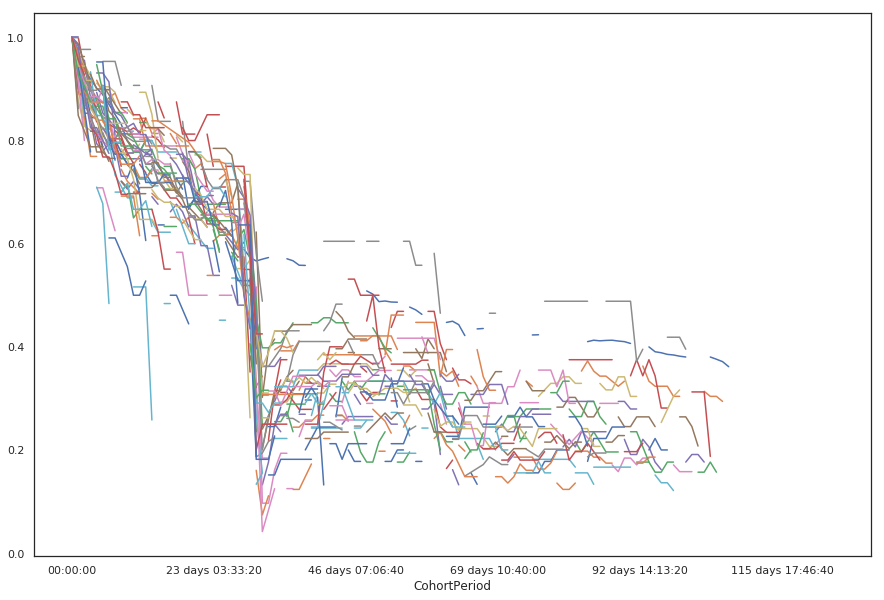

In [3]:
retention.plot(figsize=(15,10), legend=False)

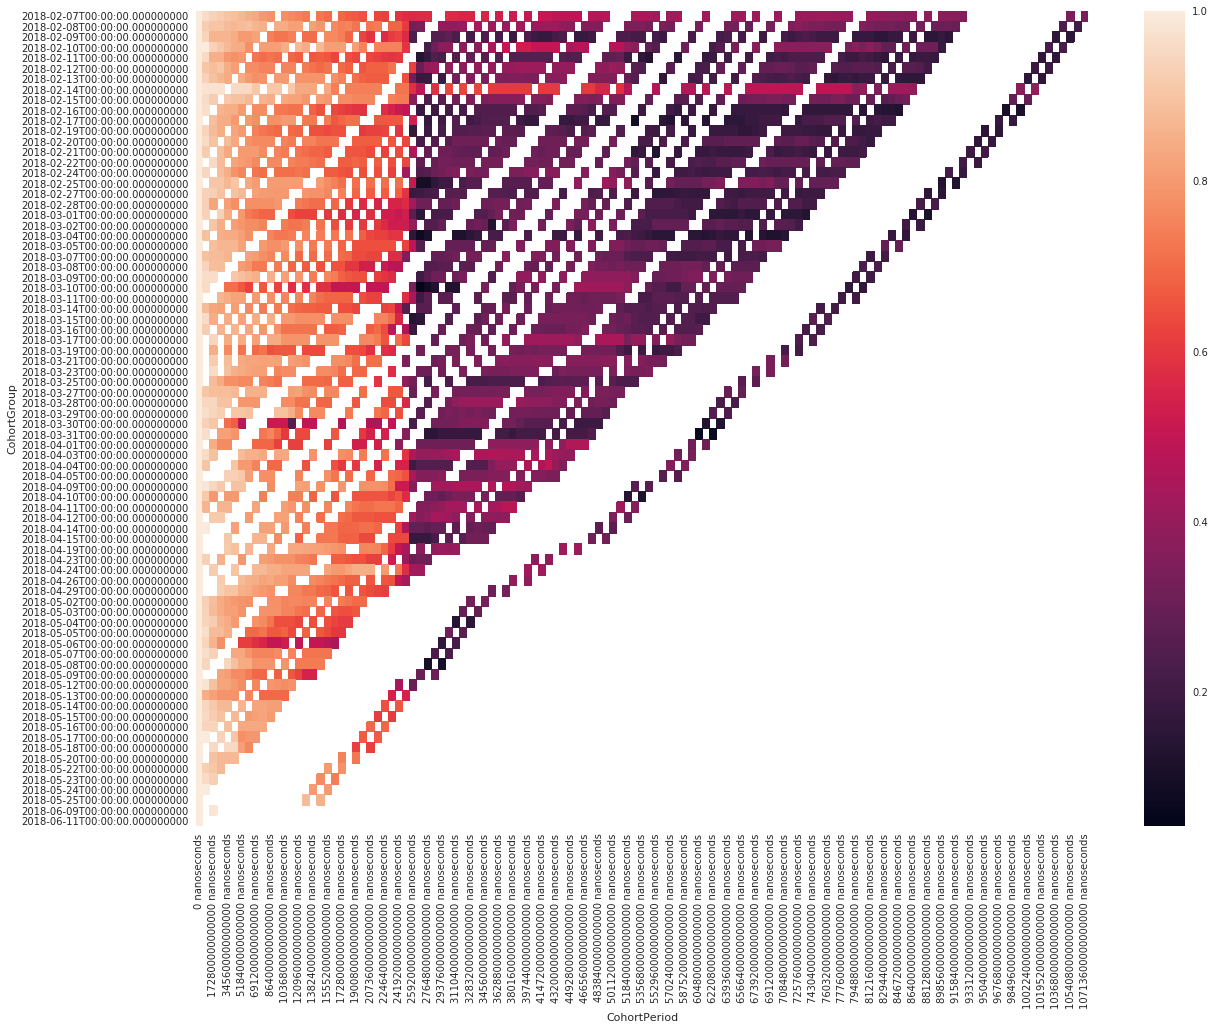

In [26]:
plt.figure(figsize=(20, 15))

plot = sns.heatmap(retention.T, )
#ax = plt.gca()
# get current xtick labels



In [16]:
import matplotlib.dates as mdates

In [22]:
retention.T.index

DatetimeIndex(['2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10',
               '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-19',
               '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-24',
               '2018-02-25', '2018-02-27', '2018-02-28', '2018-03-01',
               '2018-03-02', '2018-03-04', '2018-03-05', '2018-03-07',
               '2018-03-08', '2018-03-09', '2018-03-10', '2018-03-11',
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-17',
               '2018-03-19', '2018-03-21', '2018-03-23', '2018-03-25',
               '2018-03-27', '2018-03-28', '2018-03-29', '2018-03-30',
               '2018-03-31', '2018-04-01', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-14', '2018-04-15', '2018-04-19',
               '2018-04-23', '2018-04-24', '2018-04-26', '2018-04-29',
      